## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
df=pd.read_csv('Datasets/Car Price.csv')

## Data Wrangling

In [3]:
#show all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#we drop car_ID as it isn't useful in a ML Model
df.drop(['car_ID'], axis=1, inplace = True)

In [6]:
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
#check for null values
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
#describe the dataset
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

The column cylinder number which has categorical values like two,four, etc. We have to convert it to
discrete numeric values

In [10]:
#check unique values
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
#we replace it with int data type
df['cylindernumber']=df['cylindernumber'].replace({
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
})

In [12]:
#we have transformed the data type from object to int64
df['cylindernumber'].dtype

dtype('int64')

In [13]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [14]:
#replace categorical data with numeric data
df['doornumber']=df['doornumber'].replace({
    'four':4,
    'two':2
})

In [15]:
#check the data type
df['doornumber'].dtype

dtype('int64')

## EDA(Exploratory Data Analysis)

In [16]:
#check for outliers
#writting a simple function to detect outliers in each column
def find_outliers(df,col):
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    max_r=q3+1.5*iqr
    min_r=q1-1.5*iqr
    outliers_index=df.index[(df[col]>max_r) | (df[col]<min_r)]
    return outliers_index

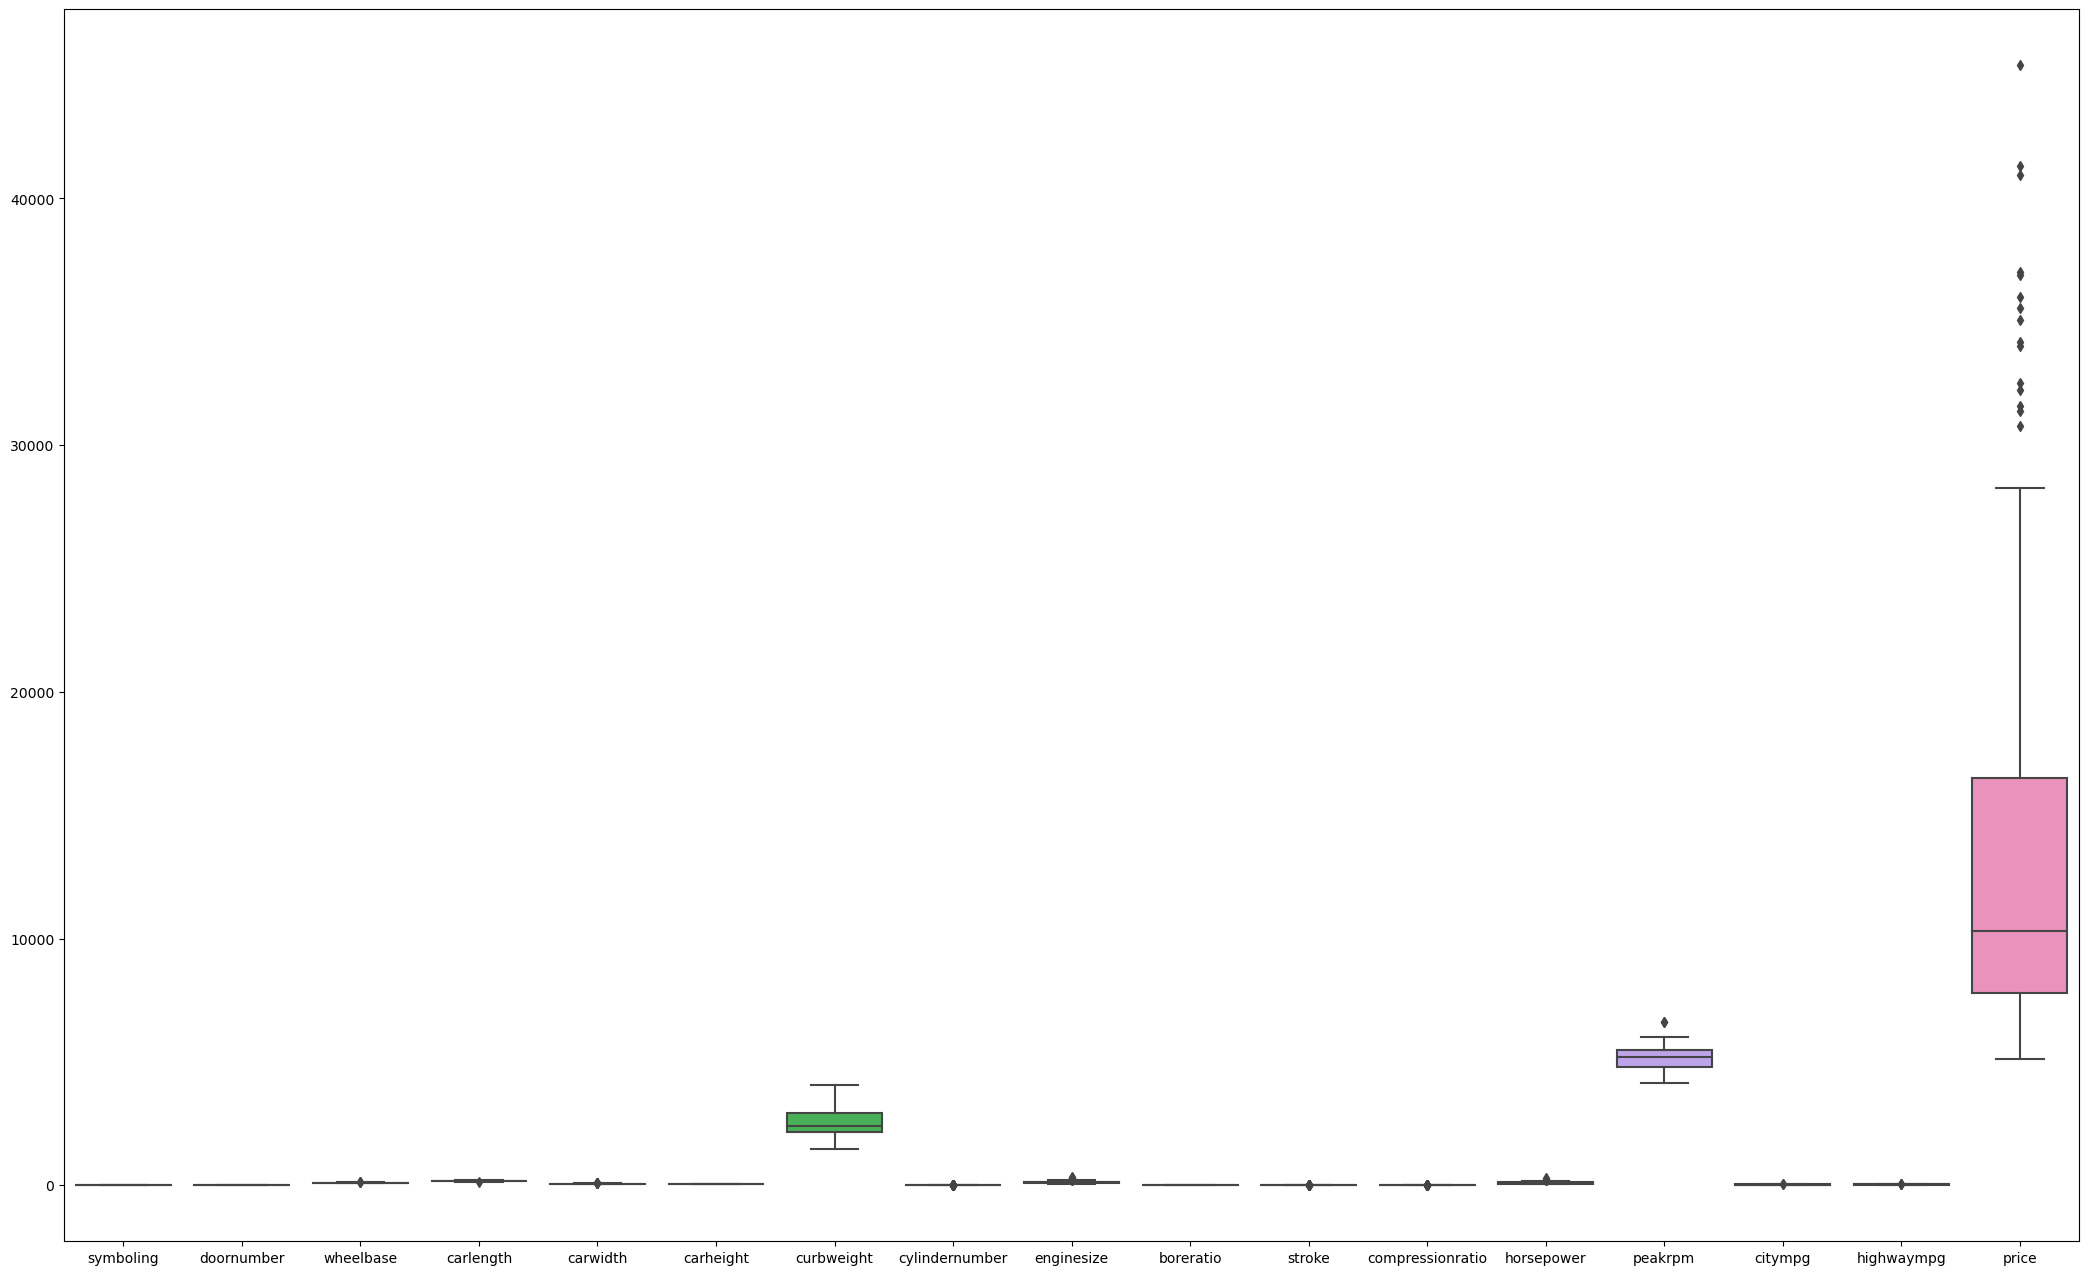

In [17]:
#we create a box plot to check the columns with outliers
plt.figure(figsize=(26,16))
sns.boxplot(data=df)
plt.show()

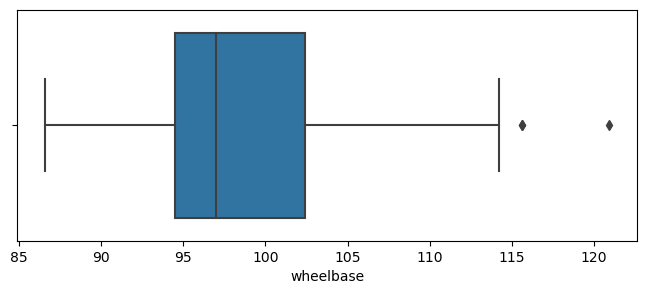

In [18]:
#wheelbase has some outliers. hence we plot it again
plt.figure(figsize=(8,3))
sns.boxplot(data=df, x='wheelbase')
plt.show()

In [19]:
#find the outlier index using the function we defined
find_outliers(df,'wheelbase')

Int64Index([70, 71, 73], dtype='int64')

In [20]:
#remove the rows where there are outliers
df.drop([70, 71, 73], axis=0,inplace=True)

In [21]:
#breaking the data frame into two consisting of numeric and string values
df_n=df.select_dtypes(exclude='object')

In [22]:
df_s=df.select_dtypes(include='object')

In [23]:
#import scipy library
import scipy.stats as stats

In [24]:
#find the zscore
z=stats.zscore(df_n)

In [25]:
z

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.733596,-1.115547,-1.765782,-0.405940,-0.846026,-2.008285,0.021920,-0.333879,0.123298,0.536212,-1.829077,-0.283192,0.194746,-0.282885,-0.668248,-0.578494,0.072966
1,1.733596,-1.115547,-1.765782,-0.405940,-0.846026,-2.008285,0.021920,-0.333879,0.123298,0.536212,-1.829077,-0.283192,0.194746,-0.282885,-0.668248,-0.578494,0.471955
2,0.116107,-1.115547,-0.711338,-0.202886,-0.158113,-0.527875,0.571640,1.621008,0.688763,-2.396234,0.689119,-0.283192,1.293165,-0.282885,-0.976435,-0.726226,0.471955
3,0.924851,0.896421,0.235874,0.253985,0.185843,0.253453,-0.399866,-0.333879,-0.416465,-0.503136,0.465988,-0.027151,-0.035155,0.773357,-0.205967,-0.135299,0.133379
4,0.924851,0.896421,0.164386,0.253985,0.284117,0.253453,0.573639,0.643564,0.277516,-0.503136,0.465988,-0.539233,0.296925,0.773357,-1.130529,-1.317154,0.598091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.501382,0.896421,1.897964,1.286174,1.512532,0.746923,0.829509,-0.333879,0.406031,1.686919,-0.330910,-0.155171,0.271380,0.562109,-0.360060,-0.430763,0.517762
201,-1.501382,0.896421,1.897964,1.286174,1.463396,0.746923,1.023410,-0.333879,0.406031,1.686919,-0.330910,-0.360004,1.446433,0.350861,-0.976435,-0.873958,0.809868
202,-1.501382,0.896421,1.897964,1.286174,1.512532,0.746923,0.949448,1.621008,1.228526,0.944528,-1.223435,-0.334400,0.782272,0.773357,-1.130529,-1.169422,1.133839
203,-1.501382,0.896421,1.897964,1.286174,1.512532,0.746923,1.359239,1.621008,0.508843,-1.171288,0.465988,3.301385,0.067023,-0.705381,0.102221,-0.578494,1.264622


In [26]:
#finding the outlier indices using 3.3 as threshold for z score
outliers_indices=np.where((z>3.3) | (z<-3.3))[0]

In [27]:
outliers_indices

array([ 16,  18,  30,  30,  47,  48,  49,  49,  49,  70,  71,  71,  71,
       108, 110, 126, 126, 131, 179, 181, 184, 189, 200])

In [28]:
len(outliers_indices)

23

In [29]:
#drop the outlier rows
df_n.drop([16,  17,  18,  30,  30,  61,  68, 103, 118,
       119, 119, 119, 124, 172, 174, 177, 182, 193], axis=0, inplace=True)

## Data Pre-processing

In [30]:
df_s

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi
202,volvo 244dl,gas,std,sedan,rwd,front,ohcv,mpfi
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,idi


In [31]:
#import label encoder from sk-learn library
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
df_s['CarName']=le.fit_transform(df_s['CarName'])
df_s['fueltype']=le.fit_transform(df_s['fueltype'])
df_s['aspiration']=le.fit_transform(df_s['aspiration'])
df_s['carbody']=le.fit_transform(df_s['carbody'])
df_s['drivewheel']=le.fit_transform(df_s['drivewheel'])
df_s['enginelocation']=le.fit_transform(df_s['enginelocation'])
df_s['enginetype']=le.fit_transform(df_s['enginetype'])
df_s['fuelsystem']=le.fit_transform(df_s['fuelsystem'])

In [34]:
#data frame has been converted to numeric values
df_s

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,2,1,0,0,2,0,0,5
1,3,1,0,0,2,0,0,5
2,1,1,0,2,2,0,5,5
3,4,1,0,3,1,0,3,5
4,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...
200,136,1,0,3,2,0,3,5
201,135,1,1,3,2,0,3,5
202,137,1,0,3,2,0,5,5
203,139,0,1,3,2,0,3,3


In [35]:
#using the merge() function to combine the two data frames
df=pd.merge(df_n,df_s, how='inner', left_index=True, right_index=True)

In [36]:
df

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,2,1,0,0,2,0,0,5
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,3,1,0,0,2,0,0,5
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0,2,2,0,5,5
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,4,1,0,3,1,0,3,5
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0,136,1,0,3,2,0,3,5
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0,135,1,1,3,2,0,3,5
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0,137,1,0,3,2,0,5,5
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,139,0,1,3,2,0,3,3


In [37]:
#divide data frame into features and targets
x_features=df.drop('price', axis=1)
y_label = df['price']

In [38]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [40]:
x_features_scaled=scaler.fit_transform(x_features)

In [41]:
x_features_scaled

array([[ 1.72635093, -1.1439589 , -1.78520937, ..., -0.12768848,
        -2.794511  ,  0.88811627],
       [ 1.72635093, -1.1439589 , -1.78520937, ..., -0.12768848,
        -2.794511  ,  0.88811627],
       [ 0.10816735, -1.1439589 , -0.71644736, ..., -0.12768848,
         1.87967109,  0.88811627],
       ...,
       [-1.51001623,  0.87415728,  1.92828573, ..., -0.12768848,
         1.87967109,  0.88811627],
       [-1.51001623,  0.87415728,  1.92828573, ..., -0.12768848,
         0.00999825, -0.10339264],
       [-1.51001623,  0.87415728,  1.92828573, ..., -0.12768848,
         0.00999825,  0.88811627]])

In [42]:
#import train test split
from sklearn.model_selection import train_test_split

In [43]:
#cross validation
x_train,x_test,y_train,y_test=train_test_split(x_features_scaled,y_label,test_size=.2,random_state=7)

## Model Creation
    *We have a number of options but we will go with Decision Tree Regressor

In [44]:
#import decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

In [45]:
model_dtr=DecisionTreeRegressor()

In [46]:
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
y_pred=model_dtr.predict(x_test)

## Model Evaluation
    *Using MAE, MSE, RMSE

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
#MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

9947153.710526315

In [56]:
#MAE
MAE=mean_absolute_error=(y_test,y_pred)
MAE

(175     9988.0
 120     6229.0
 204    22625.0
 93      7349.0
 130     9295.0
 152     6488.0
 69     28176.0
 147    10198.0
 50      5195.0
 134    15040.0
 104    17199.0
 25      6692.0
 105    19699.0
 190     9980.0
 128    37028.0
 203    22470.0
 89      5499.0
 27      8558.0
 44      8916.5
 74     45400.0
 91      6649.0
 2      16500.0
 186     8495.0
 163     8058.0
 83     14869.0
 106    18399.0
 123     8921.0
 121     6692.0
 107    11900.0
 159     7788.0
 201    19045.0
 35      7295.0
 198    18420.0
 36      7295.0
 13     21105.0
 189    11595.0
 137    18620.0
 114    17075.0
 Name: price, dtype: float64,
 array([10898. ,  6669. , 16845. ,  7999. ,  9989. ,  6338. , 25552. ,
        10795. ,  6095. , 12170. , 14489. ,  7609. , 14489. ,  8238. ,
        32528. , 13200. ,  6849. ,  7689. ,  8916.5, 36000. ,  6849. ,
        12629. ,  8195. ,  8238. , 14489. , 13499. ,  8013. ,  7799. ,
        16630. ,  7609. , 16845. ,  7499. , 18950. ,  7609. , 20970. ,
       

In [57]:
#RMSE
np.sqrt(MSE)

3153.910859635433